<h1><center><u> Thème E - Fiche 6 - Recherche textuelle </u></center></h1>

## 1. Préambule

Intéressons nous aux animaux qui interviennent dans les fables de La Fontaine (1621 - 1695). <br>Pour ce faire, commencer par charger le recueil en exécutant la cellule suivante.

In [ ]:
fichier = open('lafontaine.txt', 'r') 
fables = fichier.read()
fichier.close()

Ce fichier texte est vu comme une longue chaîne de caractères dont on peut récupérer la taille :

In [ ]:
len(fables)

Dans cette chaîne de caractères, de type ***str***, on peut rechercher la présence de chaînes de caractères de plus petites tailles que l'on appellera des motifs.<br>
La méthode ***find(motif)*** retourne le premier indice d'apparition du motif dans la chaîne, et -1 si le motif n'existe pas dans cette chaîne. <br>
On peut ainsi s'intéresser aux animaux présents dans le livre.

In [ ]:
fables.find("tux")

In [ ]:
fables.find("renard")

In [ ]:
fables.find("lion")

On peut même s'intéresser à ce qui suit le motif repéré …

In [ ]:
fables[14665:14700]

La Fontaine parle de renard, même de lion mais ne connaît pas tux …

<div class="alert alert-info" role="alert"><b>énigme 1</b> : utiliser les deux cellules de code ci-dessous pour trouver un animal qui apparaît dans les fables et un autre qui n'en fait pas partie.</div>

On peut aussi s'intéresser au nombre d'occurences d'un motif particulier en utilisant la fonction ci-dessous.

In [ ]:
def nbOccurences(texte, motif): 
    compteur, i, indices = 0, 0, []
    while True:
        occurrence = texte.find(motif, i)
        # occurrence est l'index du sous-texte à partir de l'index i
        if occurrence == -1: 
            return compteur, indices
        else:
            compteur += 1
            indices.append(occurrence)
            i = occurrence + 1

In [ ]:
nbOccurences(fables, "lion")

In [ ]:
nbOccurences(fables, "renard")

In [ ]:
nbOccurences(fables, "chien")

In [ ]:
nbOccurences(fables, "singe")

La Fontaine cite donc le lion autant de fois que le renard mais légèrement moins que le chien. Le singe est moins fréquent.

<div class="alert alert-info" role="alert"><b>énigme 2</b> : utiliser les deux cellules de code ci-dessous pour trouver un animal qui apparaît plus fréquemment que le chien et un autre qui apparaît moins fréquemment que le singe.

## 2. Objectif et notations 

L'objectif de ce TP est de chercher comment pourrait-être codée la méthode ***find(motif)***. C'est à dire comment détecter la première occurence d'une chaîne de caractères ***motif*** de longueur ***p*** dans un texte de longueur ***n*** > ***p***.

### a. algorithme naïf

<div class="alert alert-info" role="alert">Proposer dans la cellule ci-dessous (cliquer dedans pour l'activer) un algorithme de base pour effectuer cette recherche en parcourant le texte caractère par caractère. (on pourra utiliser les balises &lt; br &gt; pour passer à la ligne).</div>

Algo naïf :<br>

<div class="alert alert-success" role="alert">
<details ><summary style="summary::-webkit-details-marker { color:##dff0d8; background:#dff0d8;} ">
    
**Quelques indications**
</summary>
    <ul><li> parcourir le texte caractère à caractère</li>
        <li> repérer un caractère correspondant au premier du motif</li>
        <li> tester les suivants du motif </li>
        <li> poursuivre plus loin dans le texte en cas d'échec </li></ul>
</details></div>

<div class="alert alert-info" role="alert"> Ecrire dans la cellule ci-dessous le code Python d'une fonction <b><i> recherche_naive(texte, motif)</i></b> qui prend en paramètres le texte sous forme de chaîne de caractères <b><i>texte</i></b> et la chaîne de caractères recherchée <b><i> motif </i></b> et renvoie l'indice de la première occurence en cas de succès et - 1 sinon.</div>

<div class="alert alert-info" role="alert"> Tester dans la cellule ci-dessous la fonction précédente sur le texte et les animaux de la partie 1 et vérifier la cohérence des résultats. </div>

Remarque : Cet algorithme est dit naïf car c'est le premier auquel on pense. Bien qu'il soit correct, son efficacité est discutable et il n'est adapté qu'à des problèmes de petite taille. En effet, il effectue potentiellement (dans le pire des cas), ***p*** comparaisons à chaque passage dans la boucle ***for***, ***p*** étant la longueur du motif. Le nombre total de comparaisons est donc dans le pire des cas ***p***(***n*** − ***p*** + 1), où ***n*** est est la longueur de la chaine.

Dans le cas où ***n*** = $10^9$ et ***p*** $= 1000$, Quel est l'ordre du nombre de comparaisons ?

On verra dans ce qui suit que l'on peut faire les économies d'un grand nombre de ces comparaisons.

### b. algorithme de Boyer-Moore 

https://fr.wikipedia.org/wiki/Algorithme_de_Boyer-Moore

**Le principe** : <br>
Le principe de base est de comparer le dernier caractère du motif avec un caractère du texte. En cas de correspondance, on compare les caractères précédents sinon on décale le motif de façon la plus efficace possible.

Considérons l'exemple ci dessous.  A une certaine étape de la comparaison du motif et d'une sous-chaine extraite de la chaine, les 5 premiers caractères `a`, `b`, `c`, `d` et `e` sont identiques. En revanche, le 6ième caractère de la chaine est `c` et celui du motif est un caractère `x` différent de `c`. La comparaison s'arrête là. 

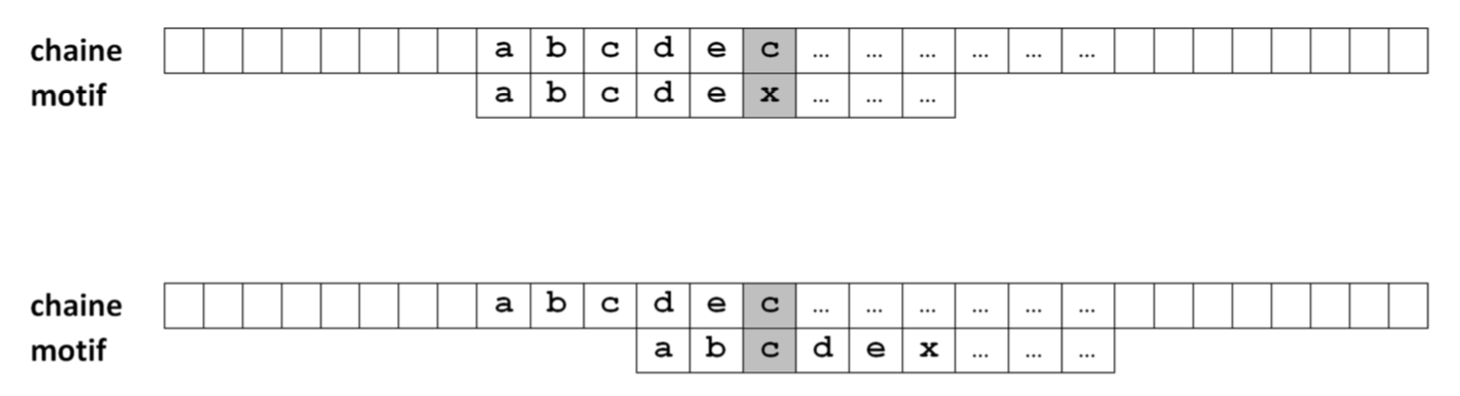


 
 L'algorithme naïf décalerait le motif d'une case vers la droite. Or le caractère précédent `x` dans le motif est `e` qui est différent de `c`. Il est donc certain qu'à l'étape suivante, la comparaison donnera un résultat faux. On peut donc sauter cette étape inutile pour gagner en efficacité. Il est même possible de décaler le motif vers la droite jusqu'à ce que le premier caractère égal à `c`, précédent `x` dans le motif, coïncide avec le caractère `c` du motif. Dans l'exemple précédent, ce décalage est de 3.
 
Si en revanche, on lit dans la chaine un caractère `y` non présent dans le motif à gauche de `x`, on décale le motif de telle sorte que son premier caractère coïncide avec le caractère de la chaine à droite de `x` comme ci dessous : 
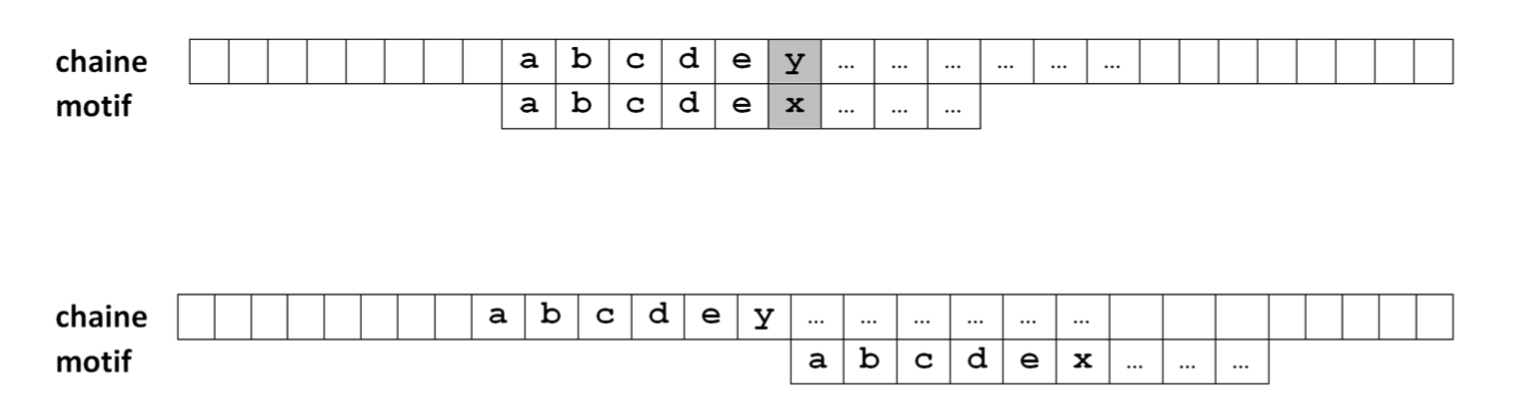

**Table de décalage**

Appelons `texte` la chaine de caractères dans laquelle on cherche un motif `motif`. Notons `n` et `p` les longueurs respectives de `texte` et `motif`.

L'algorithme de Boyer-Moore consiste à construire une table de décalage que l'on appellera `d`, à deux entrées : l'indice `j` du caractère lu dans le motif et le caractère `c` lu dans la chaine. `j` prend ses valeurs entre `0` et` p − 1` et `c` prend ses valeurs dans l'ensemble des caractères du motif.

`d` sera implémentée sous la forme d'une liste de dictionnaires de telle sorte que `d[j][c]` soit égale au décalage appliqué si le caractère` c` est lu dans la chaine et que ce caractère est différent de `motif[j]`. Comme on l'a décrit plus haut :
* Si `motif[j]` est égal à `c`, `d[j][c]` n'est pas défini.
* Sinon, s'il existe un indice `k` strictement inférieur à `j` tel que `motif[k]` soit égal à `c` et que `motif[k : j + 1]` ne contienne pas `c`, `d[j][c]` est égale à `j - k` (c'est la distance entre `motif[j]` et le premier caractère égal à `c` à gauche de `motif[k]` dans le motif).
* Sinon, `d[j][c]` est égal à `j + 1` si `motif[0 : j]` ne contient pas le caractère `c`.

Voici la table de décalage du motif `recherche` :
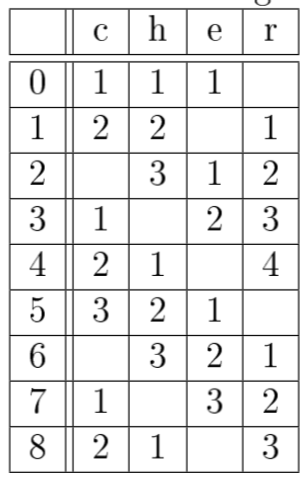


<div class="alert alert-info" role="alert"> Faire la table de décalage du motif: "renard". </div>

<div class="alert alert-info" role="alert"> Compléter dans la cellule ci-dessous le code Python d'une fonction <b><i> table_decalage(motif)</i></b> qui prend en paramètre une chaîne de caractères <b><i> motif </i></b> et renvoie la table des décalages.</div>

In [1]:
def table_decalage(motif):
    # on construit la liste sans répétitions des caractères de 'mot'
    lstcar = list(set([c for c in motif]))
    p = ...
    #construction de la table de décalage d 
    d = [{} for i in range(p)]
    for j in range(p): 
        for c in lstcar:
            # calcul du décalage
            if ... : 
                k = j-1
                while k >= 0 and motif[k] != c: 
                    ...
                d[j][c] = j - k
    return d

<div class="alert alert-info" role="alert"> Tester dans la cellule ci-dessous la fonction précédente pour le "lion" et le "renard" et vérifier la cohérence des résultats. </div>


**Description et implémentation de l'algorithme**

On veut rechercher un motif `motif` dans une chaine `texte` de longueurs respectives `p` et `n`.
<div class="alert alert-info" role="alert">
Ecrire  une fonction <b><i>decalage(d, j, c)</i></b> qui prend en argument une table de décalage <b><i>d</i></b>, un indice <b><i>j</i></b> de cette table, un caractère <b><i>c</i></b> et qui renvoie le décalage à appliquer lorsque le caractère lu dans la chaine est<b><i> c</i></b> et l'indice du caractère lu dans le motif est <b><i>j</i></b>. Cette fonction renvoie le décalage de la table, si <b><i>c</i></b> est une entrée valide du dictionnaire <b><i>d[j]</i></b>, et le décalage maximum sinon.

L'algorithme de Boyer-Moore se déroule de la façon suivante :
* On commence par construire la table de décalage `d` du motif.
* A chaque étape de l'algorithme on compare le motif avec la sous-chaine de `texte` de longueur `p` commençant à un indice `i` de la chaine, la première valeur de `i` étant 0. <br>
   Si `motif` et `texte[i : i + m]` sont égaux, le motif est trouvé.<br>
   Sinon, soit `j` le plus petit indice tel que `motif[j]` et `texte[i + j]` soient différents. On décale le motif de la valeur de `decalage(d, j, ch[i + j])`, c'est-à-dire qu'on ajoute cette valeur à `i`.

Notons que la comparaison du motif `motif` et de la sous-chaine `texte[i : i + m]` se fait de droite à gauche dans l'algorithme de Boyer-Moore.

<div class="alert alert-info" role="alert"> Compléter dans la cellule ci-dessous le code Python de la fonction <b><i> boyer_moore(texte,motif)</i></b> qui prend en paramètres le texte sous forme de chaîne de caractères <b><i>texte</i></b> et la chaîne de caractères recherchée <b><i> motif </i></b> et renvoie True en cas de succès et False sinon </div>

In [ ]:
def boyer_moore(texte, motif):
    d = ... 
    n = len(texte)
    p = len(motif)
    i = 0
    while i + p <= ... :
        j = p - 1 # on commence à droite du motif. 
        while j >= 0 and motif[j] == texte[i + j]:
            j = j - 1 
        if j == ...:
            return True
        i = ... 
    return False

<div class="alert alert-info" role="alert"> Tester dans la cellule ci-dessous la fonction précédente pour le "lion", le "renard" et "tux" ; vérifier la cohérence des résultats avec ceux de la recherche naïve. </div>

<div class="alert alert-info" role="alert"> Modifier le code Python de la fonction <b><i> boyer_moore(texte,motif)</i></b> qui prend en paramètres le texte sous forme de chaîne de caractères <b><i>texte</i></b> et la chaîne de caractères recherchée <b><i> motif </i></b> et renvoie l'indice de la première occurence en cas de succès et - 1 sinon.</div>

Le calcul précis de la **complexité de l’algorithme** précédent est difficile, et dépasse le niveau attendu en enseignement NSI.<br>
Il est cependant considéré comme un algorithme sous-linéaire : dans des cas favorables, les décalages de la fenêtre sont de l’ordre de la taille <b><i>p</i></b> du motif. En fait, l’algorithme n’est même pas tenu de lire l’intégralité du texte : c’est la sous-linéarité. Dans les cas favorable, on peut donc estimer un coût de l’ordre de <b><i>n</i></b>/<b><i>p</i></b>.

Le graphique ci-dessous, qui comptabilise le nombre de tours de boucles lors des recherches, a été obtenu à partir des listes d'animaux suivants :<br>
``` python  
animaux_presents = ['rat', 'lion', 'chien', 'renard','cigogne','araignée','paresseux','dromadaire']
animaux_absents = ['tux', 'kiwi', 'okapi','iguane','caracal','antilope','crocodile','holothurie']  
```

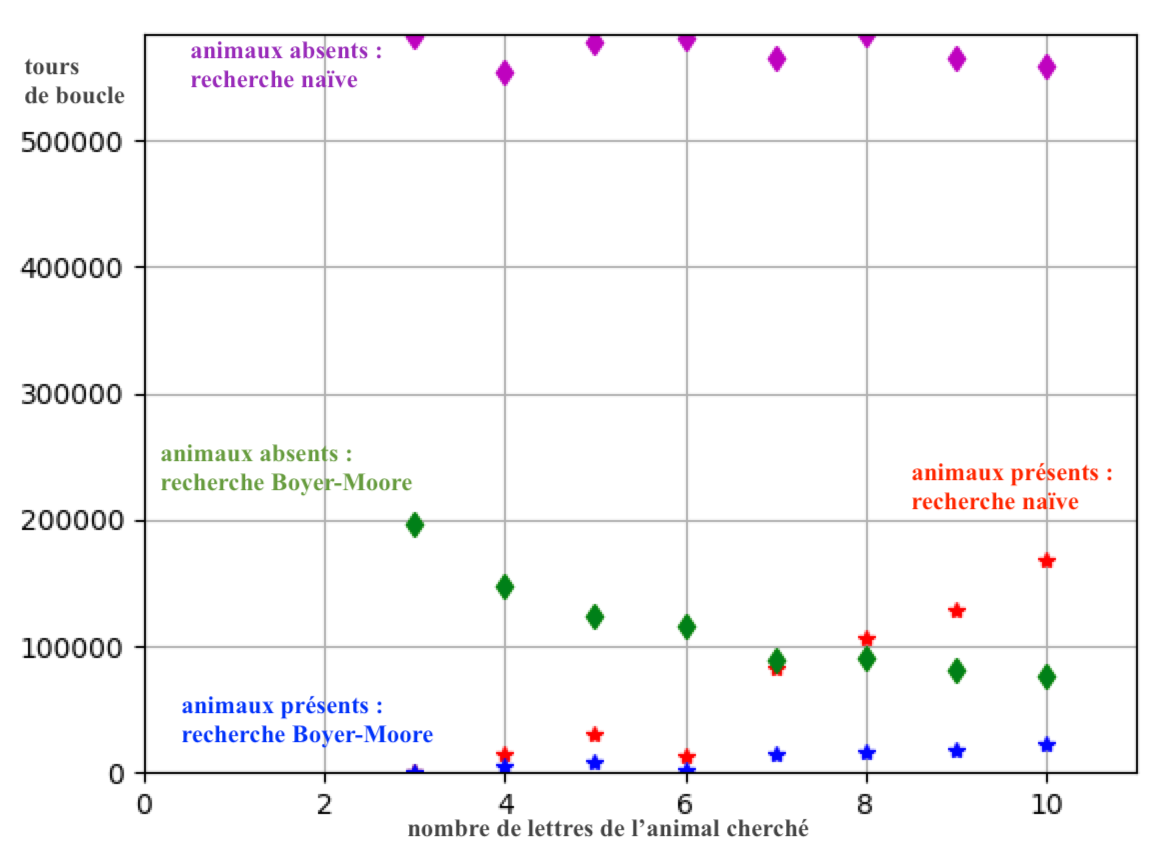